In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import math
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import mplfinance as mpf
from matplotlib.lines import Line2D
import json

In [2]:
start = dt.datetime.today()-dt.timedelta(360)
end = dt.datetime.today()
s = dt.datetime.today()-dt.timedelta(90)
e = dt.datetime.today()
st = dt.datetime.today()-dt.timedelta(2)
ed = dt.datetime.today()
ticker = 'NVDA'

In [3]:
df = yf.download(ticker, start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-18,187.839996,193.750000,185.839996,186.387497,186.260696,96885600
2021-06-21,184.352493,185.365005,178.227493,184.272507,184.147156,67238400
2021-06-22,184.714996,189.637497,183.860001,188.867493,188.739014,58014400
2021-06-23,190.077499,191.527496,189.077499,190.572495,190.442871,33235600
2021-06-24,192.277496,194.199997,190.882507,192.054993,191.924347,32092400


In [4]:
    
#function to calculate the RSI Technical Indicator
def RSI(df, n=14):
    "function to calculate RSI"
    df = df.copy()
    df["change"] = df["Adj Close"] - df["Adj Close"].shift(1)
    df["gain"] = np.where(df["change"]>=0, df["change"], 0)
    df["loss"] = np.where(df["change"]<0, -1*df["change"], 0)
    df["avgGain"] = df["gain"].ewm(alpha=1/n, min_periods=n).mean()
    df["avgLoss"] = df["loss"].ewm(alpha=1/n, min_periods=n).mean()
    df["rs"] = df["avgGain"]/df["avgLoss"]
    df["rsi"] = 100 - (100/ (1 + df["rs"]))
    return df

#function stochastic_oscillator
def add_stochastic_oscillator(df, periods=14):
    copy = df.copy()
    high_roll = copy["High"].rolling(periods).max()
    low_roll = copy["Low"].rolling(periods).min()
    # Fast stochastic indicator
    num = copy["Adj Close"] - low_roll
    denom = high_roll - low_roll
    copy["K"] = (num / denom) * 100
    # Slow stochastic indicator
    copy["D"] = copy["K"].rolling(3).mean()   
    return copy
#dfso = add_stochastic_oscillator(df, periods=14)

today = dt.datetime.now()

date_pattern = "%Y-%m-%d"
today_str = today.strftime(date_pattern)
date_ranges = {
    "1M": (today - dt.timedelta(days=30)).strftime(date_pattern),
    "3M": (today - dt.timedelta(days=90)).strftime(date_pattern),
    "6M": (today - dt.timedelta(days=180)).strftime(date_pattern),
    "1Y": (today - dt.timedelta(days=365)).strftime(date_pattern),
    "2Y": (today - dt.timedelta(days=2*365)).strftime(date_pattern),
}



In [5]:
def plot_stochastic_oscillator(dfso, ticker, rng, periods=14):
    start = date_ranges[rng]
    end = today_str
    temp_df = dfso[start:end]
    
    fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, tight_layout=True, figsize=(12, 10))

    ax[0].set_title(f"{ticker} price, {rng}")
    ax[0].plot(temp_df["Close"], color="tab:blue")

    ax[1].set_title(f"{ticker} Stochastic Oscillator ({periods}-day period), {rng}")
    ax[1].set_ylim(-10, 110)
    ax[1].plot(temp_df["K"], color="tab:blue") # fast
    ax[1].plot(temp_df["D"], color="tab:orange") # slow

    ax[1].axhline(80, color="tab:red", ls="--")
    ax[1].axhline(20, color="tab:green", ls="--")

    custom_lines = [
        Line2D([0], [0], color="tab:blue", lw=4),
        Line2D([0], [0], color="tab:orange", lw=4),
        Line2D([0], [0], color="tab:red", lw=4),
        Line2D([0], [0], color="tab:green", lw=4),
    ]
    ax[1].legend(custom_lines, ["K", "D", "Overbought", "Oversold"], loc="best")
    return fig




In [6]:
def new_SO_Plot(stock,period, interval):
    start = dt.datetime.today()-dt.timedelta(360)
    end = dt.datetime.today()
    s = dt.datetime.today()-dt.timedelta(90)
    e = dt.datetime.today()
    st = dt.datetime.today()-dt.timedelta(2)
    ed = dt.datetime.today()
    ticker = 'NVDA'
    df = yf.download(ticker, start, end)
    #df.head()
    dfso = add_stochastic_oscillator(df, periods=14)
    fig_stock = plot_stochastic_oscillator(dfso, ticker, "6M")
    graphJSON_stock = json.dumps(fig_stock, cls=plotly.utils.PlotlyJSONEncoder)
    return graphJSON_stock

In [7]:
dfso = add_stochastic_oscillator(df, periods=14)

/Users/satishsurath/opt/anaconda3/envs/ibkr/lib/python3.9/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


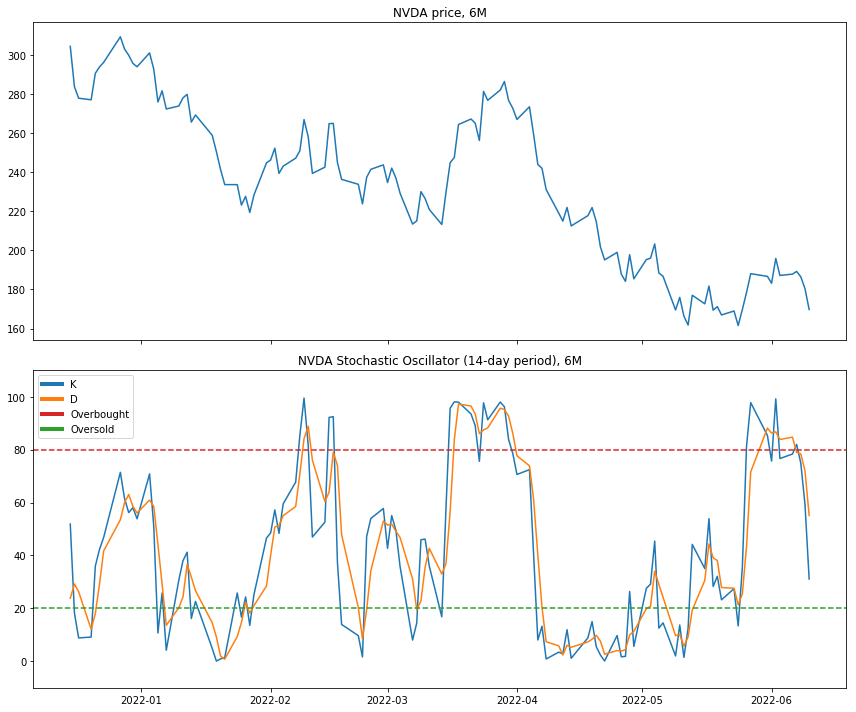

In [8]:
fig_stock = plot_stochastic_oscillator(dfso, ticker, "6M")

In [ ]:
#graphJSON_stock = json.dumps(fig_stock, cls=plotly.utils.PlotlyJSONEncoder)

type(fig_stock)

In [ ]:
import plotly.tools as tls

In [ ]:
plotly_fig = tls.mpl_to_plotly(fig_stock)

In [ ]:
type(plotly_fig)

In [ ]:
plotly_fig



In [ ]:
graphJSON_stock = json.dumps(plotly_fig, cls=plotly.utils.PlotlyJSONEncoder)

In [ ]:
graphJSON_stock

In [22]:
#Ritwik Thakar  13:
data = add_stochastic_oscillator(df, periods=14)
data['Oversold'] = 20
data['Overbought'] = 80
data.head()

,Open,High,Low,Close,Adj Close,Volume,K,D,Oversold,Overbought
Date,,,,,,,,,,
2021-06-18,187.839996,193.750000,185.839996,186.387497,186.260696,96885600,NaN,NaN,20,80
2021-06-21,184.352493,185.365005,178.227493,184.272507,184.147156,67238400,NaN,NaN,20,80
2021-06-22,184.714996,189.637497,183.860001,188.867493,188.739014,58014400,NaN,NaN,20,80
2021-06-23,190.077499,191.527496,189.077499,190.572495,190.442871,33235600,NaN,NaN,20,80
2021-06-24,192.277496,194.199997,190.882507,192.054993,191.924347,32092400,NaN,NaN,20,80


In [30]:

# Stochastic Oscillator
# Candlestick chart for pricing
import panel as pn
from panel.interact import interact
pn.extension("plotly")

fig_so= make_subplots(rows=2, cols=1)
fig_so.append_trace(
    go.Candlestick(
        x=data.index,
        open=data['Open'],
        high=data['High'],
        low=data['Low'],
        close=data['Adj Close'],
        increasing_line_color='green',
        decreasing_line_color='red',
        showlegend=False
    ), row=1, col=1
)

fig_so.append_trace(go.Scatter(x=data.index, y=data['K'], name='K',
                         line = dict(color='blue', width=2)), row = 2, col = 1)
fig_so.append_trace(go.Scatter(x=data.index, y=data['D'], name='D',
                         line = dict(color='red', width=2)), row = 2, col = 1)
fig_so.append_trace(go.Scatter(x=data.index, y=data['Oversold'], name='Oversold',
                         line = dict(color='green', width=2, dash='dash')), row = 2, col = 1)
fig_so.append_trace(go.Scatter(x=data.index, y=data['Overbought'], name='Overbought',
                         line = dict(color='red', width=2, dash='dash')), row = 2, col = 1)
# Make it pretty
layout = go.Layout(
    height=1000, width=1200,
    plot_bgcolor='#EFEFEF',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=20,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# Update options and show plot
fig_so.update_layout(layout)
#fig_so.show()
# Create Columns
sto_ind = pn.Column(fig_so)

In [31]:
#sto_ind = pn.Column(fig_so)

In [32]:
#type(sto_ind)

In [33]:
#fig_so.show()
sto_ind

Column
    [0] Plotly(Figure)